## Implementing Gradient Descent
In this module you are given the implementation of Gradient Descent for the generated synthetic data. Your task is to apply good programming practices like meaningful variable names, code formatting, docstrings and moudlarity to the code and reimplement the gradient descent. Hints are provided at the bottom.

In [1]:
# importing necassary python packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Generating Synthetic Data
* ***Re-Generate the data if coefficient turn out to be 0***

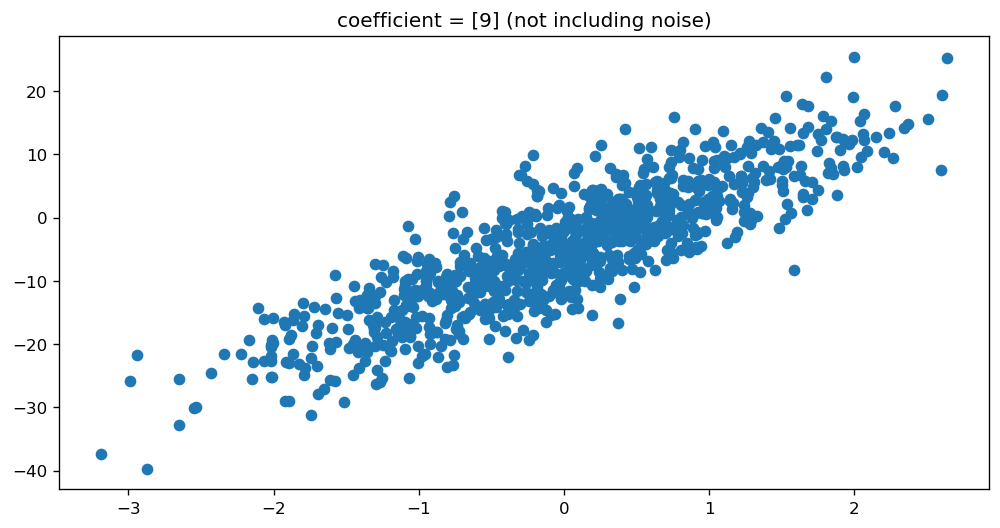

In [2]:
# generating independent variables as a normal distribution with mean=0, std_dev=1 for 1000 samples
X = np.random.normal(0, 1, 1000)
# generating weight as a random integer
W = np.random.random_integers(-10, 10, 1)
# regenerating weight if weight turns out to be 0
while(W == 0):
    W = np.random.random_integers(-10, 10, 1)
#generating dependent variable by (multiplying weight * independent variable) + bias(a random integer between -5 to +5)
Y = [(x * W) for x in X ]
Y = [y + np.random.normal(-5, 5, 1) for y in Y]

plt.figure(figsize = (10, 5), dpi = 120)
plt.scatter(X, Y)
plt.title("coefficient = {} (not including noise)".format(W))
plt.show()

### Raw Gradient Descent
* X = Independent variable
* Y = Dependent Variable

**Stop Condition**
1. GD completes iterations.
2. Cost compared to previous iteration is less that threshold

In [3]:
# initialising weight and bias
w = 0.1
iterations = 1000
cost_old  = 0
cost_new = 100
cost_threshold = 10**(-7)
size = len(X)
lr = 0.01

# GD loop
for iteration in range(iterations):
    
    # generating predictions
    predictions = []
    for i in range(size):
        predictions.append(X[i]*w)
    
    # loop for calculating cost
    cost = []
    for i in range(size):
        cost.append((predictions[i]-Y[i])**2)
    cost_new = sum(cost)/size
    
    # checking if cost is significant
    if abs(cost_new - cost_old) < cost_threshold:
        print("Gradient Descent Converged after {} iterations\nComputed Weight = {}".format(iteration, w))
        break
    # checking if max iterations reached
    elif iteration == iterations-1:
        print("Max iterations reached\n Final Weight = {}".format(w))
        break
    
    # weight gradient
    tmp = []
    for i in range(size):
        tmp.append((w*X[i]-Y[i])*X[i])
    
    dw = 2*(sum(tmp))/size
    
    # updating weight
    w = w - lr*dw
    
    cost_old = cost_new

Gradient Descent Converged after 446 iterations
Computed Weight = [8.61777403]


## Solution

In [ ]:
%load_ext lab_black

### Defining Modular Functions: **Hint**

In [8]:
def generating_predictions(data_x, weight):
    """
    input: list_independent_variables, weight
    function: generates the model line by multiplying independent variables with weight
    output: linear regression model line
    """
    size = len(data_x)
    predictions = []
    # generating predictions
    for i in range(size):
        predictions.append(data_x[i]*weight)
    return predictions


def calculating_cost(predictions, data_y):
    """
    input: generated linear regression model line, output variable list
    function: subtracts the output line from the generated linear regression model to calculate the loss
    output: mean squared error
    """
    cost = []
    size = len(predictions)
    # calculating cost
    for i in range(size):
        cost.append((predictions[i]-data_y[i])**2)
    cost_new = sum(cost)/size
    return cost_new
    

def gd_converged(cost_new, cost_old, threshold):
    """
    input: cost_new, cost_old, threshold
    function: returns true if the error is low by checking if (cost_new - cost_old) < threshold
    output: boolean indicating if the gradient descent converged or not
    """
    return abs(cost_new - cost_old) < threshold
    
    
def iterations_complete(current_iteration, max_iteration):
    """
    input: current_iteration_number, maximum_iteration_number
    function: checks if the current iteration is the last iteration
    output: returns true if the current iteration is the last iteration
    """
    return current_iteration == max_iteration-1
    
    
def calculating_gradient(weight, data_x, data_y):
    """
    input: weight, data_x, data_y
    functions: computes the weight gradient
    output: weight gradient
    """
    size = len(data_x)
    tmp = []
    # calculating gradient
    for i in range(size):
        tmp.append((weight*data_x[i]-data_y[i])*data_x[i])
    
    dw = 2*(sum(tmp))/size
    return dw

### Defining primary function that calls all modular function

In [10]:
def gradient_descent(data_x, data_y, iterations=100, cost_threshold=10**(-7), lr=0.001):
    """Runs the gradient descent algorithm for a simple linear regression with one variable.
    Both the dependent and independent variables should be of equal length

    params:
    data_x(list): elements of independent variable
    data_y(list): elements of target variable
    iteratons(int>=1): number of iteration for GD is to be run. default = 100
    cost_threshold(float>0): a positive small value. A cost difference smaller than this would stop GD from running furhther. default = 10^(-7)
    lr(float>0): learning rate or update rate of the weights.
    """
    # initialising cost variables and weight
    cost_old, cost_new = 0, 100
    w = 0.1

    # gradient descent process
    for iteration in range(iterations):
        predictions = generating_predictions(data_x, w)
        cost_new = calculating_cost(predictions, data_y)
        # checking stopping condition
        if gd_converged(cost_new, cost_old, cost_threshold):
            print("Gradient Descent Converged after {} iterations\nComputed Weight = {}".format(iteration, w))
            break
        elif iterations_complete(iteration, iterations):
            print("Max iterations reached\n Final Weight = {}".format(w))
            break
        # calculating gradient and updating
        dw = calculating_gradient(w, data_x, data_y)
        w = w - lr * dw
        # updating cost for next iteration
        cost_old = cost_new

In [12]:
# computing gradient descent
gradient_descent(X, Y, iterations=1000, cost_threshold=10 ** (-7), lr=0.01)

Gradient Descent Converged after 446 iterations
Computed Weight = [8.61777403]
